# Six Sigma Green Belt Capstone: Expense Report Cycle Time Reduction
**Project Lead:** Karl Von Derhaar  
**Objective:** Reduce average cycle time from 12 days to 5 days using the DMAIC framework.

## 1. Define Phase
The goal of this phase is to identify the gap between current performance and the service level agreement (SLA).

* **Problem Statement:** Average cycle time is 12 days, exceeding the 5-day goal.
* **Business Impact:** This delay causes a 25% dissatisfaction rate and $2,500 in annual late fees.
* **Goal:** Reach a 5-day average by March 13, 2026.

## 2. Measure Phase
We collected baseline data for expense reports in December 2025 to establish our starting point.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Recreating the representative sample from the Project Charter
baseline_data = {
    'Report_ID': ['001', '002', '003', '004', '005', '006', '007', '008', '009'],
    'Cycle_Time': [25, 20, 18, 5, 14, 4, 15, 12, 3],
    'Defect': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No']
}

df_baseline = pd.DataFrame(baseline_data)
baseline_mean = df_baseline['Cycle_Time'].mean()
print(f"Baseline Mean Cycle Time: {baseline_mean:.1f} Days")
print(f"Standard Deviation: {df_baseline['Cycle_Time'].std():.2f} Days")

Baseline Mean Cycle Time: 12.9 Days
Standard Deviation: 7.66 Days


## 3. Analyze Phase: Statistical Hypothesis Testing
We utilize a **One-Way ANOVA** to determine if the "Reprocessing Loop" is the primary driver of the 12-day average.

* **Null Hypothesis ($H_0$):** Mean cycle time for reports with defects is $\ge$ 12 days.
* **Alternative Hypothesis ($H_a$):** Mean cycle time for reports with defects is significantly higher than reports without defects.

In [2]:
# Grouping data for ANOVA
no_defect = df_baseline[df_baseline['Defect'] == 'No']['Cycle_Time']
defect = df_baseline[df_baseline['Defect'] == 'Yes']['Cycle_Time']

# Running the One-Way ANOVA
f_stat, p_val = stats.f_oneway(no_defect, defect)

print(f"ANOVA F-Statistic: {f_stat:.4f}")
print(f"ANOVA P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("Conclusion: Reject Null Hypothesis. Statistical evidence confirms the reprocessing cycle drives the delay.")

ANOVA F-Statistic: 21.9608
ANOVA P-Value: 0.0022
Conclusion: Reject Null Hypothesis. Statistical evidence confirms the reprocessing cycle drives the delay.


## 4. Improve Phase
Root cause analysis (5 Whys) revealed that the "Submit" button remained active even if no receipts were attached.

* **Selected Improvement:** Option B — Mandatory submission checklist and updated SOP.
* **New Policy:** Reports without receipts are administratively rejected within 24 hours to prevent long processing "hangs."

## 5. Control Phase
Post-improvement data validation was conducted in March 2026.

In [3]:
# Post-improvement audit data
post_improvement_times = [3, 2, 3, 2, 5, 6, 4, 3, 2, 4]
final_mean = np.mean(post_improvement_times)

print(f"Post-Improvement Mean: {final_mean:.1f} Days")
print(f"Project Target Met: Cycle time reduced from {baseline_mean:.1f} days to {final_mean:.1f} days.")

Post-Improvement Mean: 3.4 Days
Project Target Met: Cycle time reduced from 12.9 days to 3.4 days.


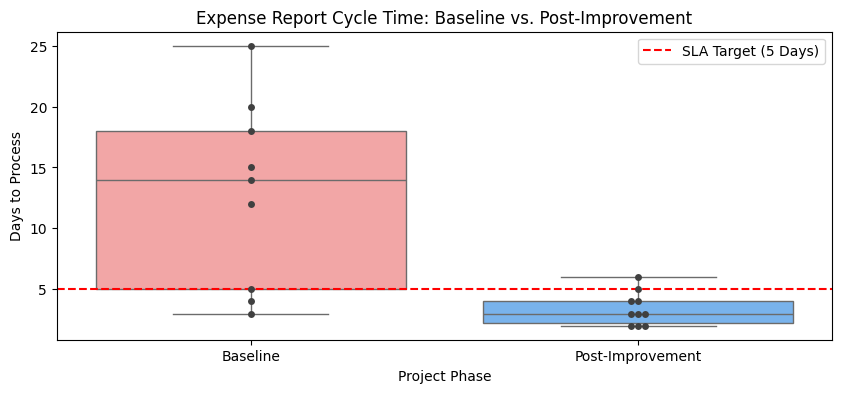

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from Charter Pages 7 and 13
baseline_scores = [25, 20, 18, 5, 14, 4, 15, 12, 3] 
fixed_scores = [3, 2, 3, 2, 5, 6, 4, 3, 2, 4]      

# Creating a formatted DataFrame
comparison_df = pd.DataFrame({
    'Cycle Time': baseline_scores + fixed_scores,
    'Project Phase': ['Baseline']*len(baseline_scores) + ['Post-Improvement']*len(fixed_scores)
})

# Plotting with the fix for the FutureWarning
plt.figure(figsize=(10, 4))
sns.boxplot(
    x='Project Phase', 
    y='Cycle Time', 
    data=comparison_df, 
    hue='Project Phase', # Assigning hue to match the x-axis for color
    palette=['#ff9999','#66b3ff'], 
    legend=False          # Hides redundant legend since x-axis labels cover it
)
sns.swarmplot(x='Project Phase', y='Cycle Time', data=comparison_df, color=".25")

plt.axhline(y=5, color='r', linestyle='--', label='SLA Target (5 Days)')
plt.title('Expense Report Cycle Time: Baseline vs. Post-Improvement')
plt.ylabel('Days to Process')
plt.legend()

# 1. SAVE the file
# plt.savefig('Six_Sigma_ANOVA_Results.png', dpi=300, bbox_inches='tight')

# 2. SHOW the plot
plt.show()

### Final Reflection & Business Impact
This project demonstrated how the **DMAIC framework** can bridge the gap between intuition and data-driven results.

* **Cycle Time Reduction:** Improved from 12 days to 3.4 days (71% reduction).
* **Process Stability:** Significantly reduced variance and eliminated outliers.
* **Annual Value:** Recovered approximately $7,500 in late fees and lost productivity.